# Using a machine learning approach for the CAP_3 data

dataset:logit_2

Outcome (y): colon_screen

Predictors (x):

 hc_cov + dr_race + dr_ethnicity +
  time_category + employ + hi_bcholest + acid + age

Model: Logistic

Number of observations: 79

In [1]:
# Load required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns




read in the logit_2 dataset

In [8]:
# Load the dataset
df = pd.read_csv('/content/logit_2_data')

df.head()

# drop the first column (identifier)
df = df.drop(df.columns[0], axis=1)

df.head()




,colon_screen,hc_cov,dr_race,dr_ethnicity,time_category,employ,hi_bcholest,acid,age
0,1,2,1,1,3,1,2,2,63
1,1,2,2,2,3,0,1,1,54
2,1,2,1,1,2,1,2,2,64
3,1,2,1,1,3,0,1,2,69
4,1,2,1,1,3,0,2,2,74


set outcome and predictors, split traning and testing set

In [16]:
# Define the predictors and the outcome variable
X = df[['hc_cov', 'dr_race', 'dr_ethnicity', 'time_category','employ','hi_bcholest',
        'acid', 'age']]
y = df['colon_screen']

# Split the data into training and testing sets (50% training, 50% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Standardized the predictors so that they have equal weights

In [17]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build the Logistic Regression Model

In [18]:

# Initialize the logistic regression model
logit_2 = LogisticRegression()

# Fit the model on the training data
logit_2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = logit_2.predict(X_test_scaled)
y_pred_prob = logit_2.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class


Check accuracy, percison, ROC-AUC and confusion matrix


# accuracy score:
Accuracy is a metric that measures how often a machine learning model correctly predicts the outcome


# percison:
Precision shows how often an ML model is correct when predicting the target class

# recall:
Recall is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset



In [19]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score # Import necessary functions

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}") # a recall = 1 might be over-fitting

Accuracy: 0.875
Precision: 0.8918918918918919
Recall: 0.9705882352941176


ROC-AUC, confusion matrix, f1 socre

ROC-AUC Score: 0.72
Confusion Matrix:
[[ 2  4]
 [ 1 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.89      0.97      0.93        34

    accuracy                           0.88        40
   macro avg       0.78      0.65      0.69        40
weighted avg       0.86      0.88      0.86        40



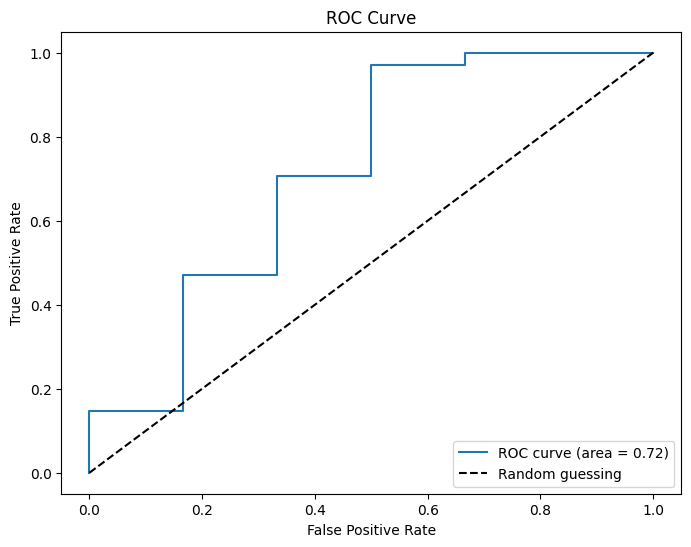

In [20]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# test set might be too small

 Model Interpretation

In [21]:
# Coefficients of the model
coefficients = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': logit_2.coef_[0]
})

# Calculate the Odds Ratio by exponentiating the coefficients
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])

# Sort by the Odds Ratio for easier interpretation
coefficients_sorted = coefficients.sort_values(by='Odds_Ratio', ascending=False)

# Display the coefficients and odds ratios
print(coefficients_sorted)


       Predictor  Coefficient  Odds_Ratio
3  time_category     1.292858    3.643183
0         hc_cov     0.547387    1.728730
7            age     0.273557    1.314633
5    hi_bcholest     0.109697    1.115940
6           acid     0.036510    1.037185
1        dr_race    -0.607041    0.544961
2   dr_ethnicity    -0.607041    0.544961
4         employ    -0.735686    0.479177


Fit a normal logistic model to check significant predictors

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = df[['hc_cov', 'dr_race', 'dr_ethnicity', 'time_category','employ','hi_bcholest',
        'acid', 'age']]
y = df['colon_screen']

# Add a constant to the model (intercept)
X_with_const = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# Print the summary to see coefficients, p-values, and more
print(result.summary())

# Calculate odds ratios by exponentiating the coefficients
odds_ratios = np.exp(result.params)

# Extract p-values
p_values = result.pvalues

# Combine everything into a DataFrame
summary_df = pd.DataFrame({
    'Predictor': X_with_const.columns,
    'Coefficient': result.params,
    'Odds_Ratio': odds_ratios,
    'p_value': p_values
})

# Print the complete summary DataFrame
print(summary_df)

# Filter for significant predictors (p-value < 0.05)
significant_predictors = summary_df[summary_df['p_value'] < 0.05]
print("Significant predictors:")
print(significant_predictors)


Optimization terminated successfully.
         Current function value: 0.192275
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           colon_screen   No. Observations:                   79
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            8
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.4938
Time:                        00:51:23   Log-Likelihood:                -15.190
converged:                       True   LL-Null:                       -30.007
Covariance Type:            nonrobust   LLR p-value:                 0.0002452
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -14.7498      7.232     -2.040      0.041     -28.923      -0.576
hc_cov            4.

Input for each variables then show predicted outcome

In [25]:
# Get user inputs for each predictor
input_data = {}
for predictor in X.columns:
    value = float(input(f"Enter the value for {predictor}: "))
    input_data[predictor] = value

# Convert input data to a DataFrame with the same structure as the model's predictors
input_df = pd.DataFrame([input_data])

# Add a constant term to the input data (intercept)
input_df_with_const = sm.add_constant(input_df, has_constant='add') # Ensure a constant is added even if it thinks one exists

# Predict the outcome probability using the model
predicted_prob = result.predict(input_df_with_const)[0]

# Determine the predicted class based on the threshold of 0.5
predicted_class = 1 if predicted_prob >= 0.5 else 0

# Output the result
print(f"Predicted probability: {predicted_prob:.4f}")
print(f"Predicted outcome (class): {predicted_class}")

Enter the value for hc_cov: 1
Enter the value for dr_race: 1
Enter the value for dr_ethnicity: 1
Enter the value for time_category: 2
Enter the value for employ: 1
Enter the value for hi_bcholest: 1
Enter the value for acid: 1
Enter the value for age: 2
Predicted probability: 0.0002
Predicted outcome (class): 0


In [ ]:
# run the above section to put in inputs